In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

In [2]:
SalesData = pd.read_csv('SalesData.csv')

In [3]:
SalesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountId           3709 non-null   int64  
 1   AccountName         3709 non-null   object 
 2   Region              3709 non-null   object 
 3   Division            3709 non-null   object 
 4   City                3709 non-null   object 
 5   State               3709 non-null   object 
 6   Tier                3709 non-null   object 
 7   Month               3709 non-null   object 
 8   Sales2015           3709 non-null   float64
 9   Sales2016           3709 non-null   float64
 10  Units2015           3709 non-null   float64
 11  Units2016           3709 non-null   float64
 12  TargetAchevied2015  3709 non-null   float64
 13  TargetAchevied2016  3709 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


In [5]:
SalesData.head().T

,0,1,2,3,4
AccountId,1116,1116,2391,2391,2397
AccountName,Account1,Account1,Account2,Account2,Account3
Region,West,West,East,East,East
Division,DIAMONDBACK,DIAMONDBACK,MINUTEMEN,MINUTEMEN,MINUTEMEN
City,PHOENIX W,PHOENIX W,HARTFORD,HARTFORD,WORCESTER
State,AZ,AZ,CT,CT,MA
Tier,Low,Low,Med,Med,Med
Month,Aug,Oct,Jun,Mar,Sep
Sales2015,0.0,10500.78,0.0,19881.0,3684.48
Sales2016,13208.52,23114.91,6627.0,13254.0,0.0


In [8]:
import warnings
warnings.filterwarnings("ignore")

#### Yearly Sales by region 

In [9]:
sns.set(rc={"figure.dpi":300})
sns.set(rc={'figure.figsize':(6,4)})

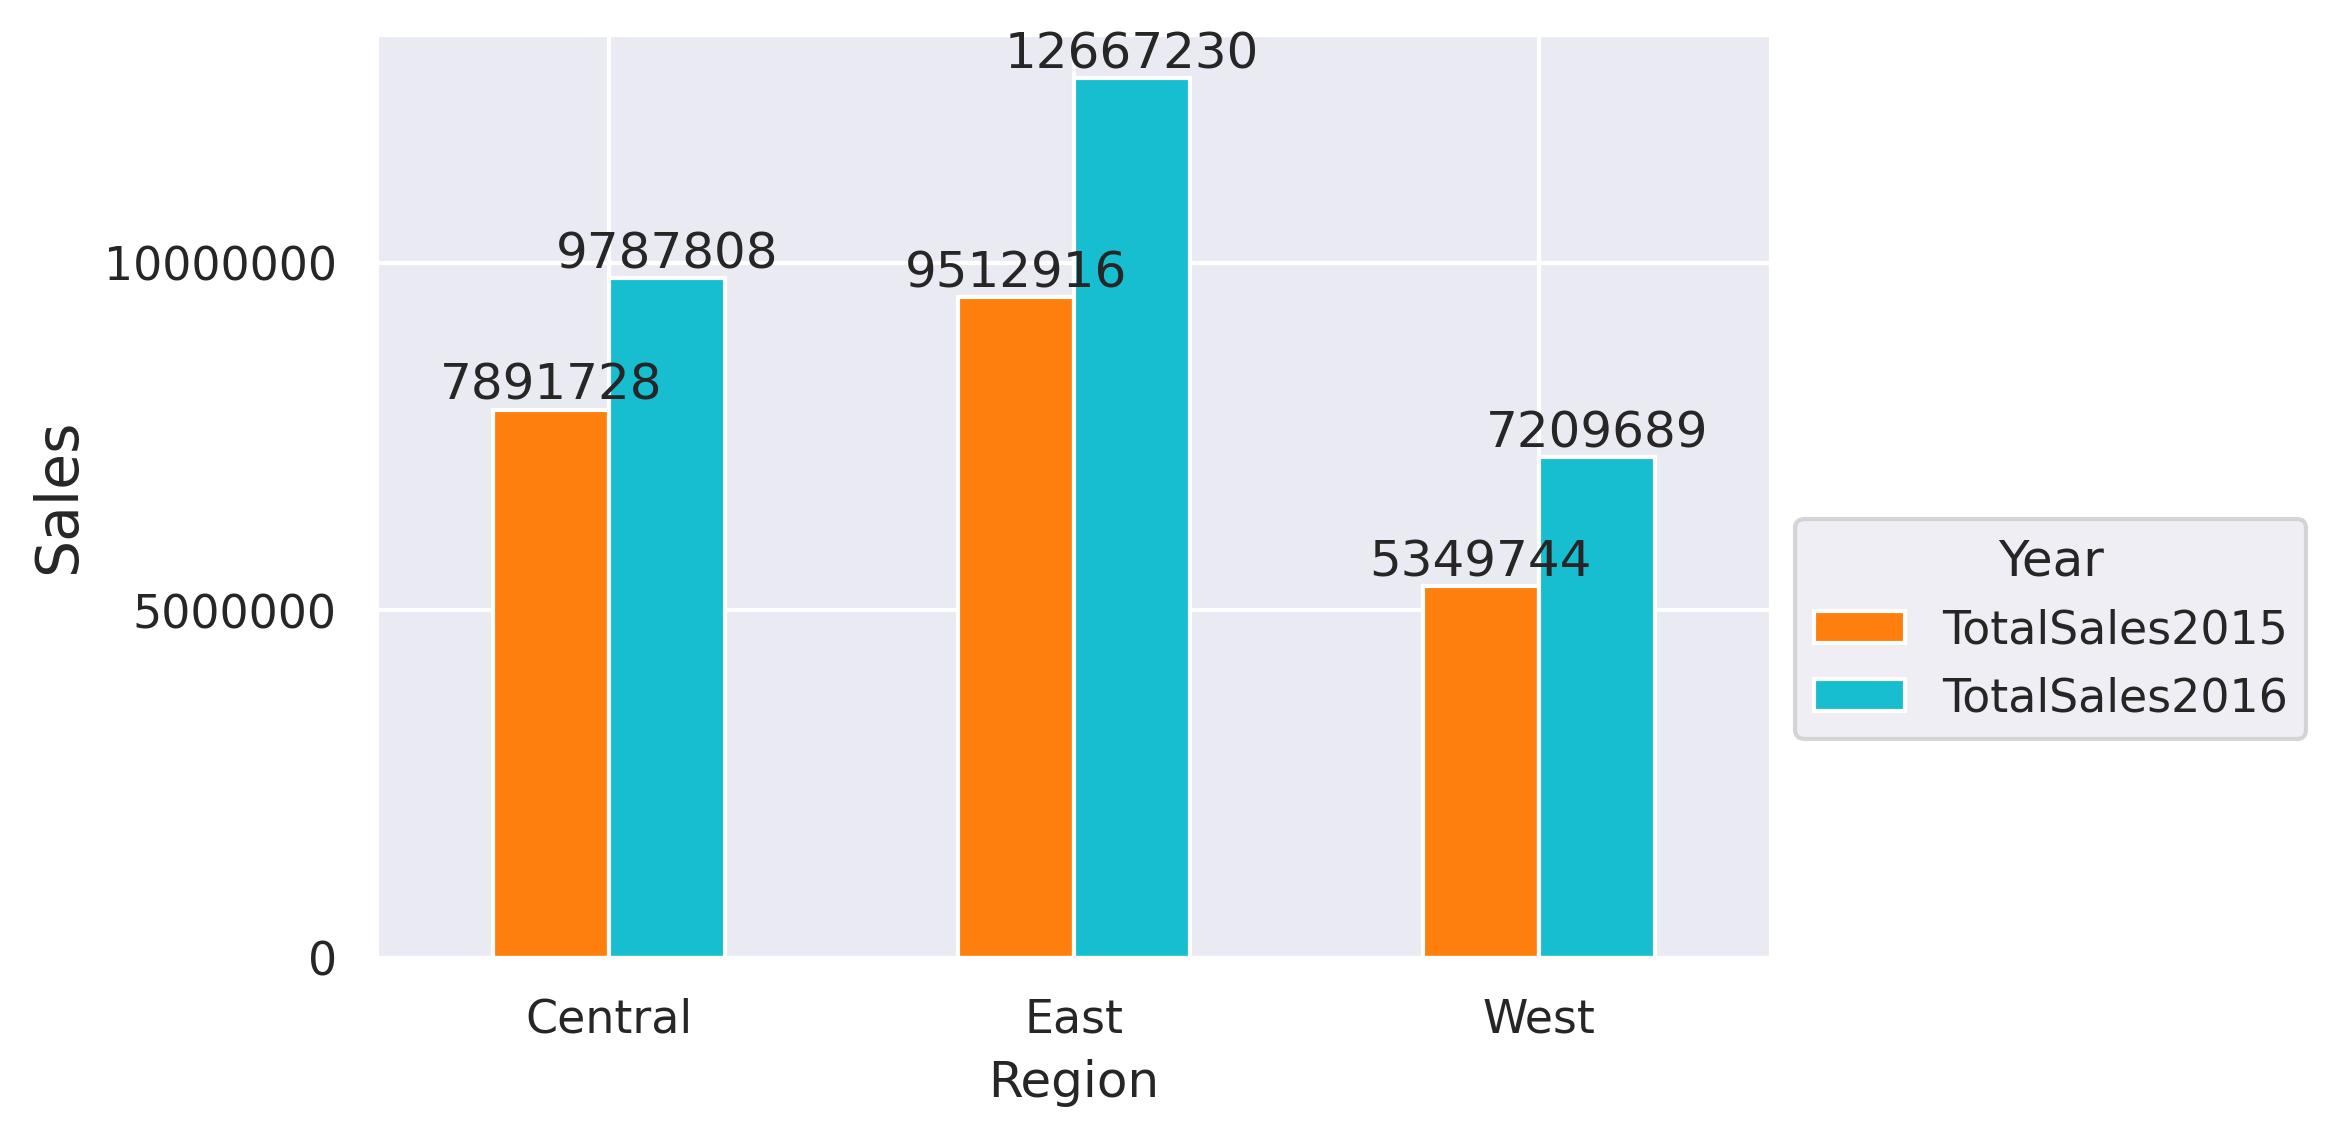

In [13]:
ax=SalesData.groupby('Region')['Sales2015','Sales2016'].sum().plot(kind='bar',rot=0,
                                                                color=['tab:orange','tab:cyan'])

ax.legend(['TotalSales2015','TotalSales2016'],title='Year',bbox_to_anchor=(1.4,0.5))
ax.set_ylabel('Sales',fontsize=14)
ax.set_yticks([0,5000000,10000000])

for container in (ax.containers):
    ax.bar_label(container,fmt='%d')
    
plt.ticklabel_format(axis="y",style='plain')
plt.show()


#### Region wise sales percentage for the year 2016


In [15]:
grp_data = SalesData.groupby('Region')['Sales2016'].sum()

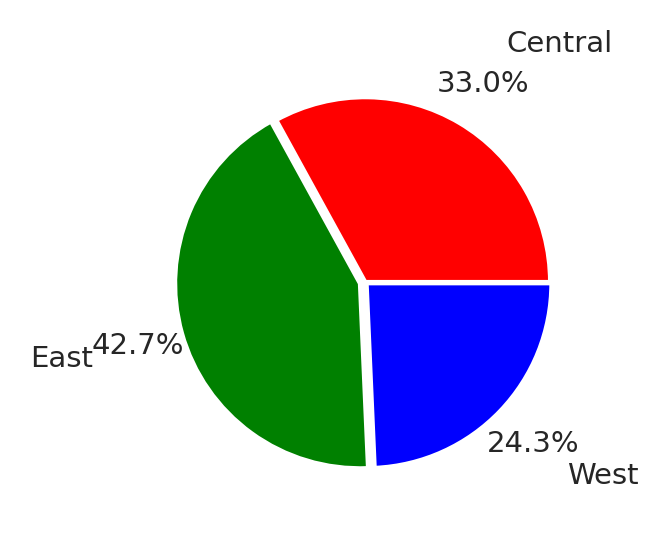

In [19]:
plt.figure(figsize=(3,2))
plt.rcParams['font.size'] = 7

colors = ['red','green','blue']
textprops = {"fontsize":7}

plt.pie(grp_data,labels = grp_data.index, labeldistance=1.5, 
        radius = 1,colors = colors, textprops = textprops,
        explode =[0,0.03,0.01], autopct='%1.1f%%',pctdistance=1.25)


plt.show()

####  Comparison of the total sales of 2015 and 2016 with respect to Region and Tiers


In [43]:
df = pd.DataFrame(SalesData.groupby(['Region','Tier'])['Sales2015','Sales2016'].sum().\
                    stack())

In [44]:
df.reset_index(inplace=True)

In [45]:
df.rename({'level_2':'SalesYear',0:'TotalSales'},axis=1,inplace=True)
df.head()

,Region,Tier,SalesYear,TotalSales
0,Central,High,Sales2015,4.798698e+06
1,Central,High,Sales2016,6.026043e+06
2,Central,Low,Sales2015,9.434397e+05
3,Central,Low,Sales2016,1.132833e+06
4,Central,Med,Sales2015,2.068226e+06


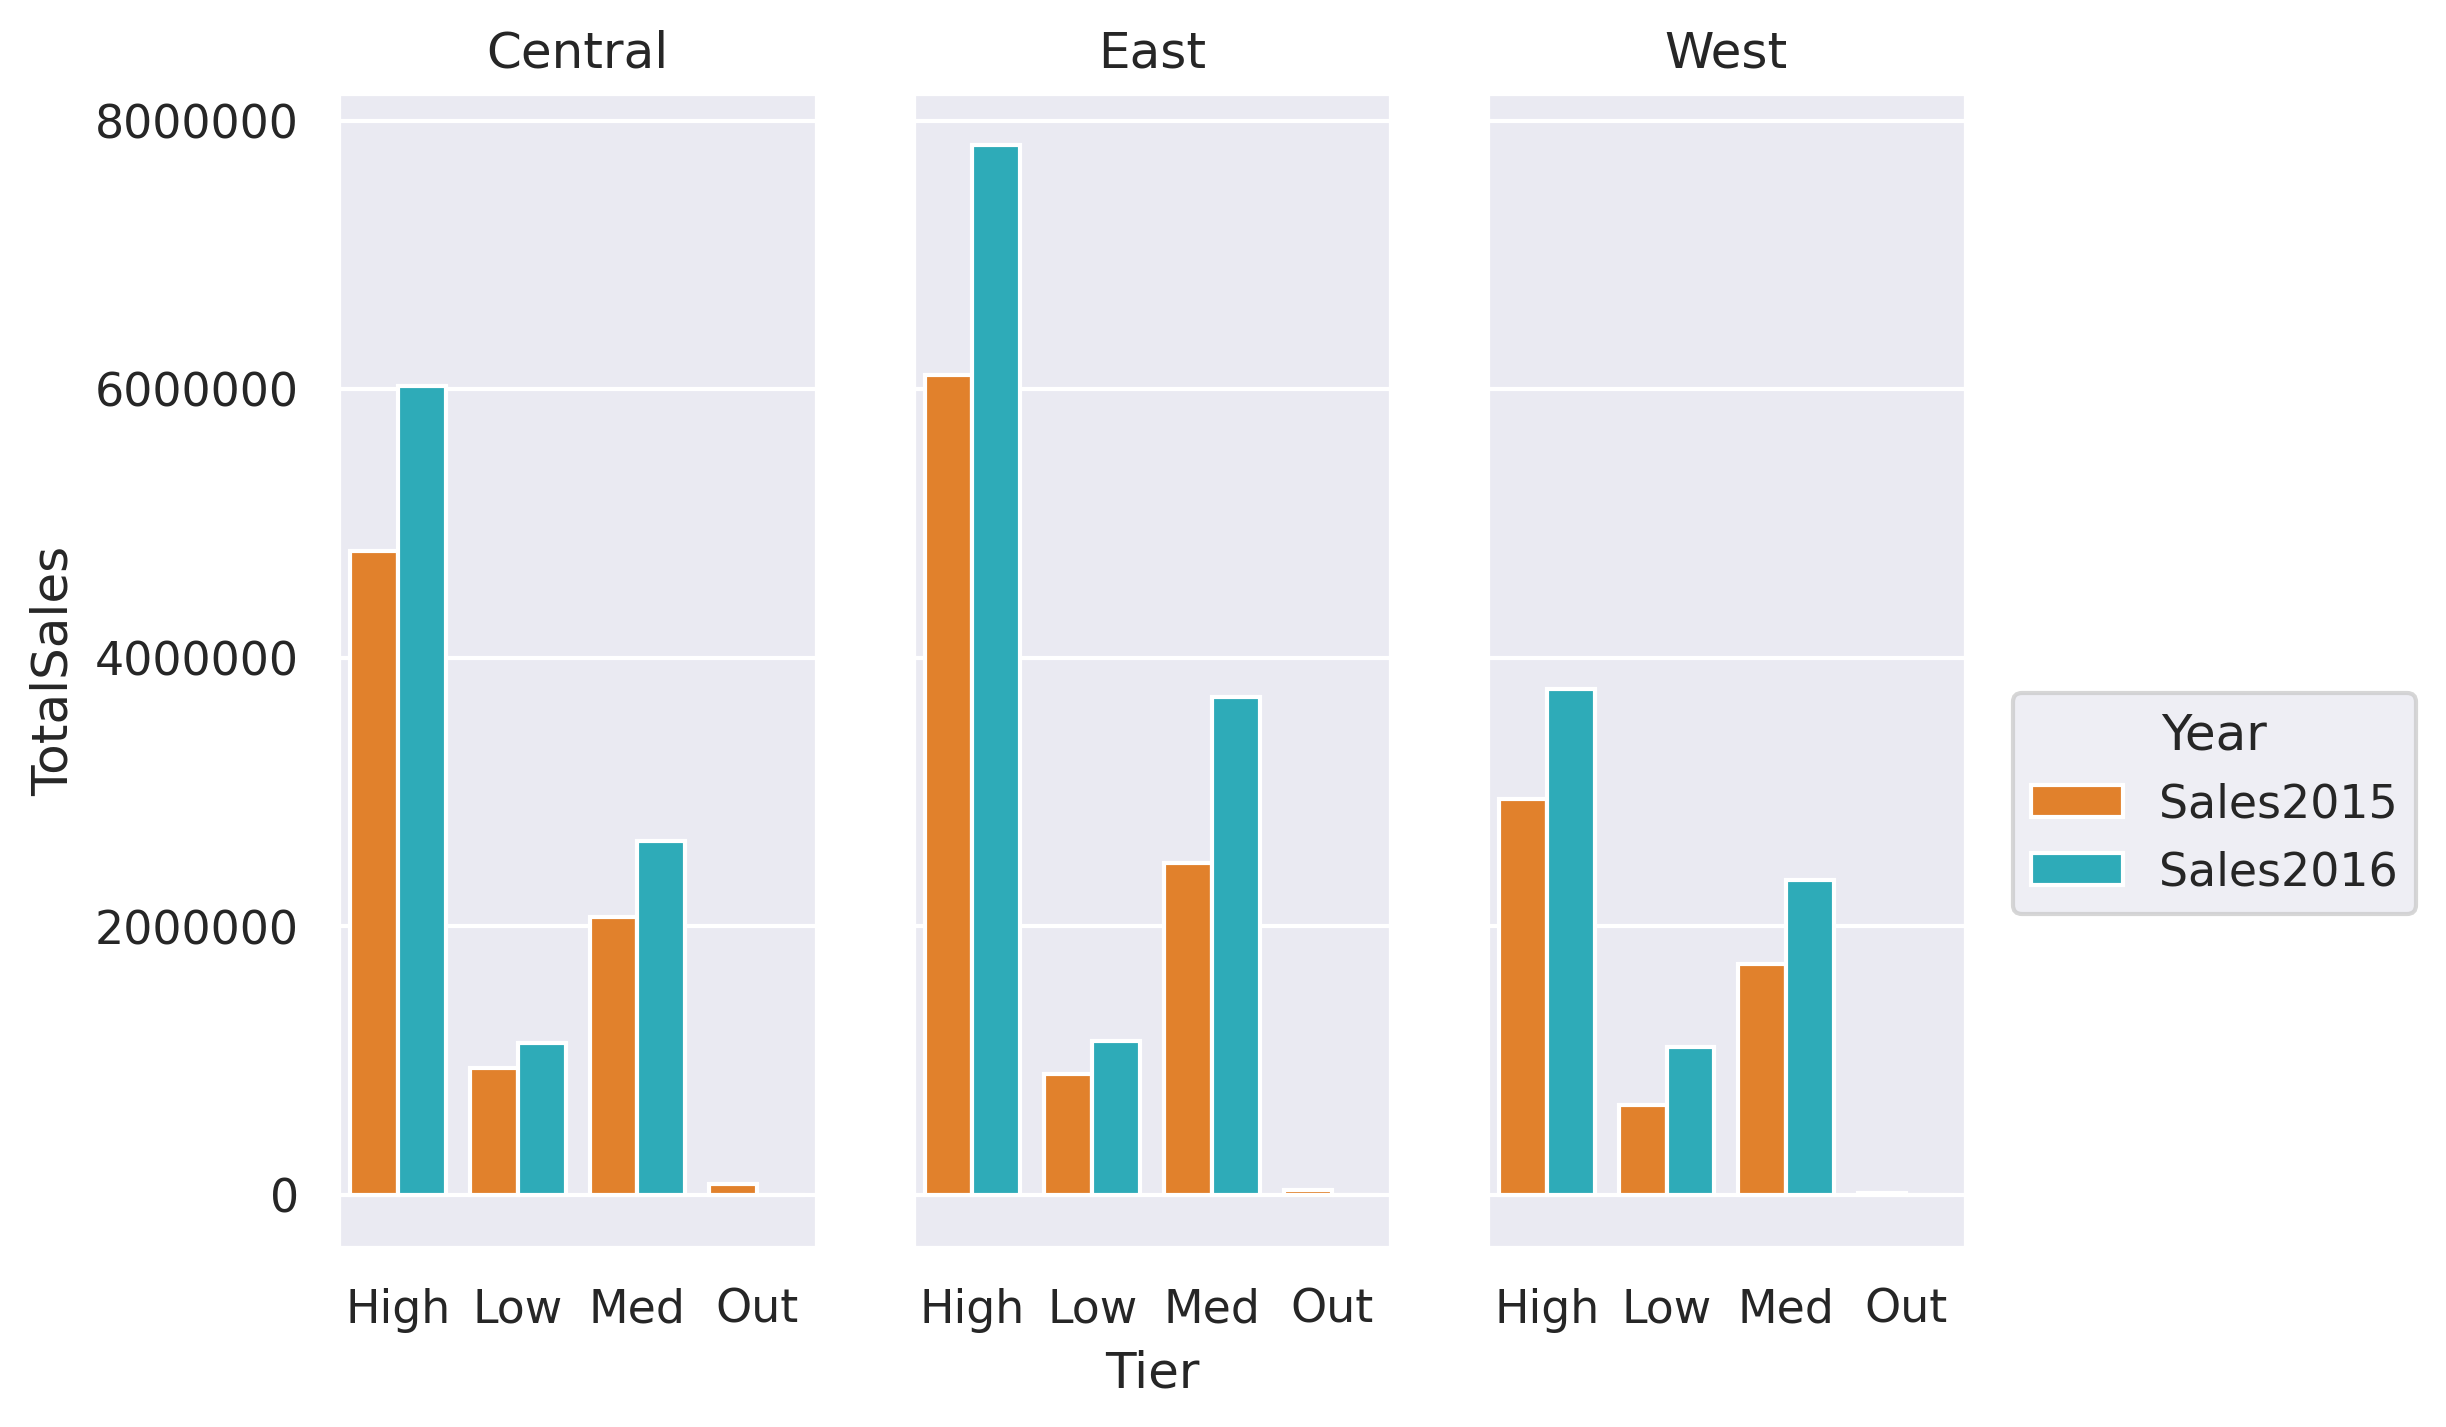

In [25]:
fig, axes = plt.subplots(1, 3,figsize = (7,5),sharey=True)

sns.barplot(data = df[df['Region']=='Central'],
            x = 'Tier',y = 'TotalSales',hue='SalesYear',palette=['tab:orange','tab:cyan'],
            ax=axes[0])
sns.barplot(data = df[df['Region']=='East'],
            x = 'Tier',y = 'TotalSales',hue='SalesYear',palette=['tab:orange','tab:cyan'],
            ax=axes[1])
sns.barplot(data = df[df['Region']=='West'],
            x = 'Tier',y = 'TotalSales',hue='SalesYear',palette=['tab:orange','tab:cyan'],
            ax=axes[2])

axes[0].legend([],frameon=False)
axes[1].legend([],frameon=False)
axes[2].legend(title='Year',bbox_to_anchor=(1.05,0.5))

axes[1].set_ylabel("")
axes[2].set_ylabel("")
axes[0].set_xlabel("")
axes[2].set_xlabel("")

axes[0].set_title("Central")
axes[1].set_title("East")
axes[2].set_title("West")

axes[0].set_yticks([0,2000000,4000000,6000000,8000000])
plt.ticklabel_format(axis="y",style='plain')

plt.show()

#### State wise sales for the East region 

In [26]:
data_East = pd.DataFrame(SalesData[SalesData['Region']=='East'].groupby('State')
                         ['Sales2015','Sales2016'].sum().stack())

In [27]:
data_East.reset_index(inplace=True)

In [28]:
data_East.rename({'level_1':'SalesYear',0:'TotalSales'},axis=1,inplace=True)
data_East.head()

,State,SalesYear,TotalSales
0,CT,Sales2015,197202.79
1,CT,Sales2016,323502.31
2,DC,Sales2015,216723.95
3,DC,Sales2016,257421.69
4,FL,Sales2015,1660162.00


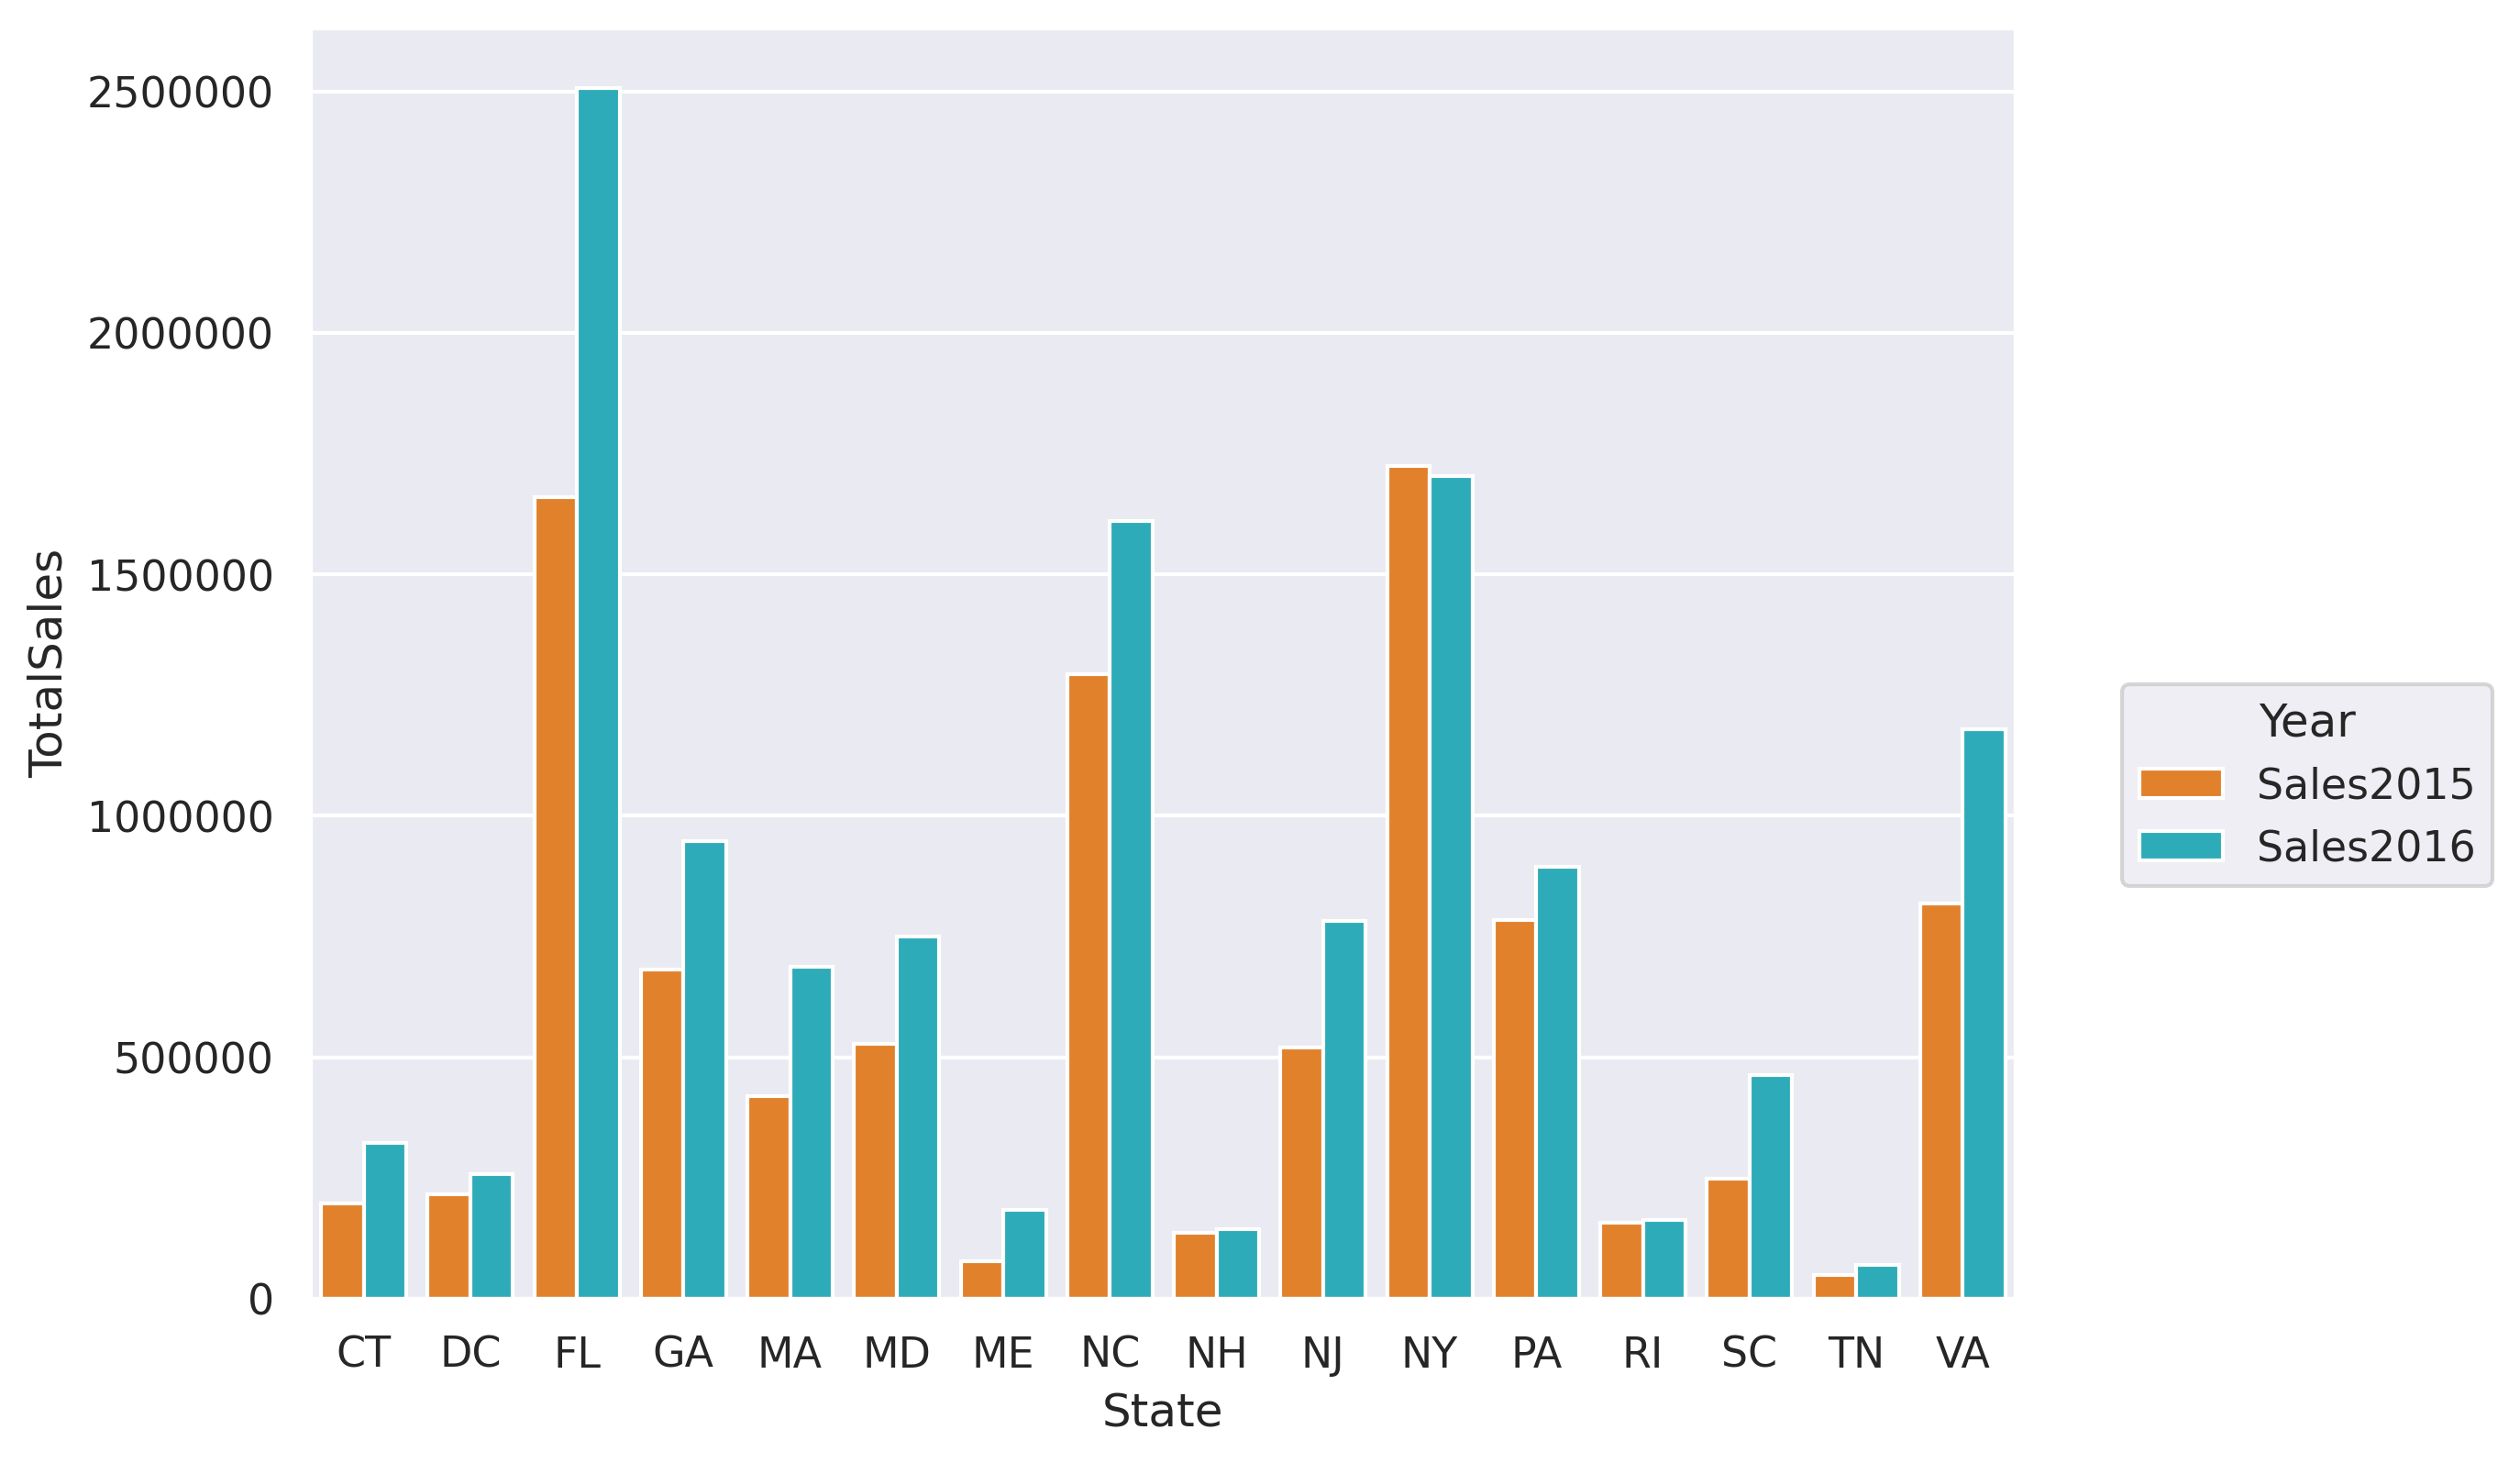

In [29]:
sns.set(rc={'figure.figsize':(8,6)})

sns.barplot(data = data_East, x = 'State',y = 'TotalSales',
            hue='SalesYear',palette=['tab:orange','tab:cyan'])

plt.legend(title='Year',bbox_to_anchor=(1.05,0.5))
plt.ticklabel_format(axis="y",style='plain')

plt.show()

In East region NY registered a decline in sales in 2016 as compared to 2015

#### Division wise units sold for 'High' Tier

In [30]:
data_High = pd.DataFrame(SalesData[SalesData['Tier']=='High'].groupby('Division')
                         ['Units2015','Units2016'].sum().stack())

In [31]:
data_High.reset_index(inplace=True)

In [32]:
data_High.rename({'level_1':'SalesYear',0:'TotalUnits'},axis=1,inplace=True)
data_High.head()

,Division,SalesYear,TotalUnits
0,BIG APPLE,Units2015,180.8330
1,BIG APPLE,Units2016,231.0000
2,CHARGERS,Units2015,123.6666
3,CHARGERS,Units2016,164.4999
4,CONGRESSIONAL,Units2015,164.5003


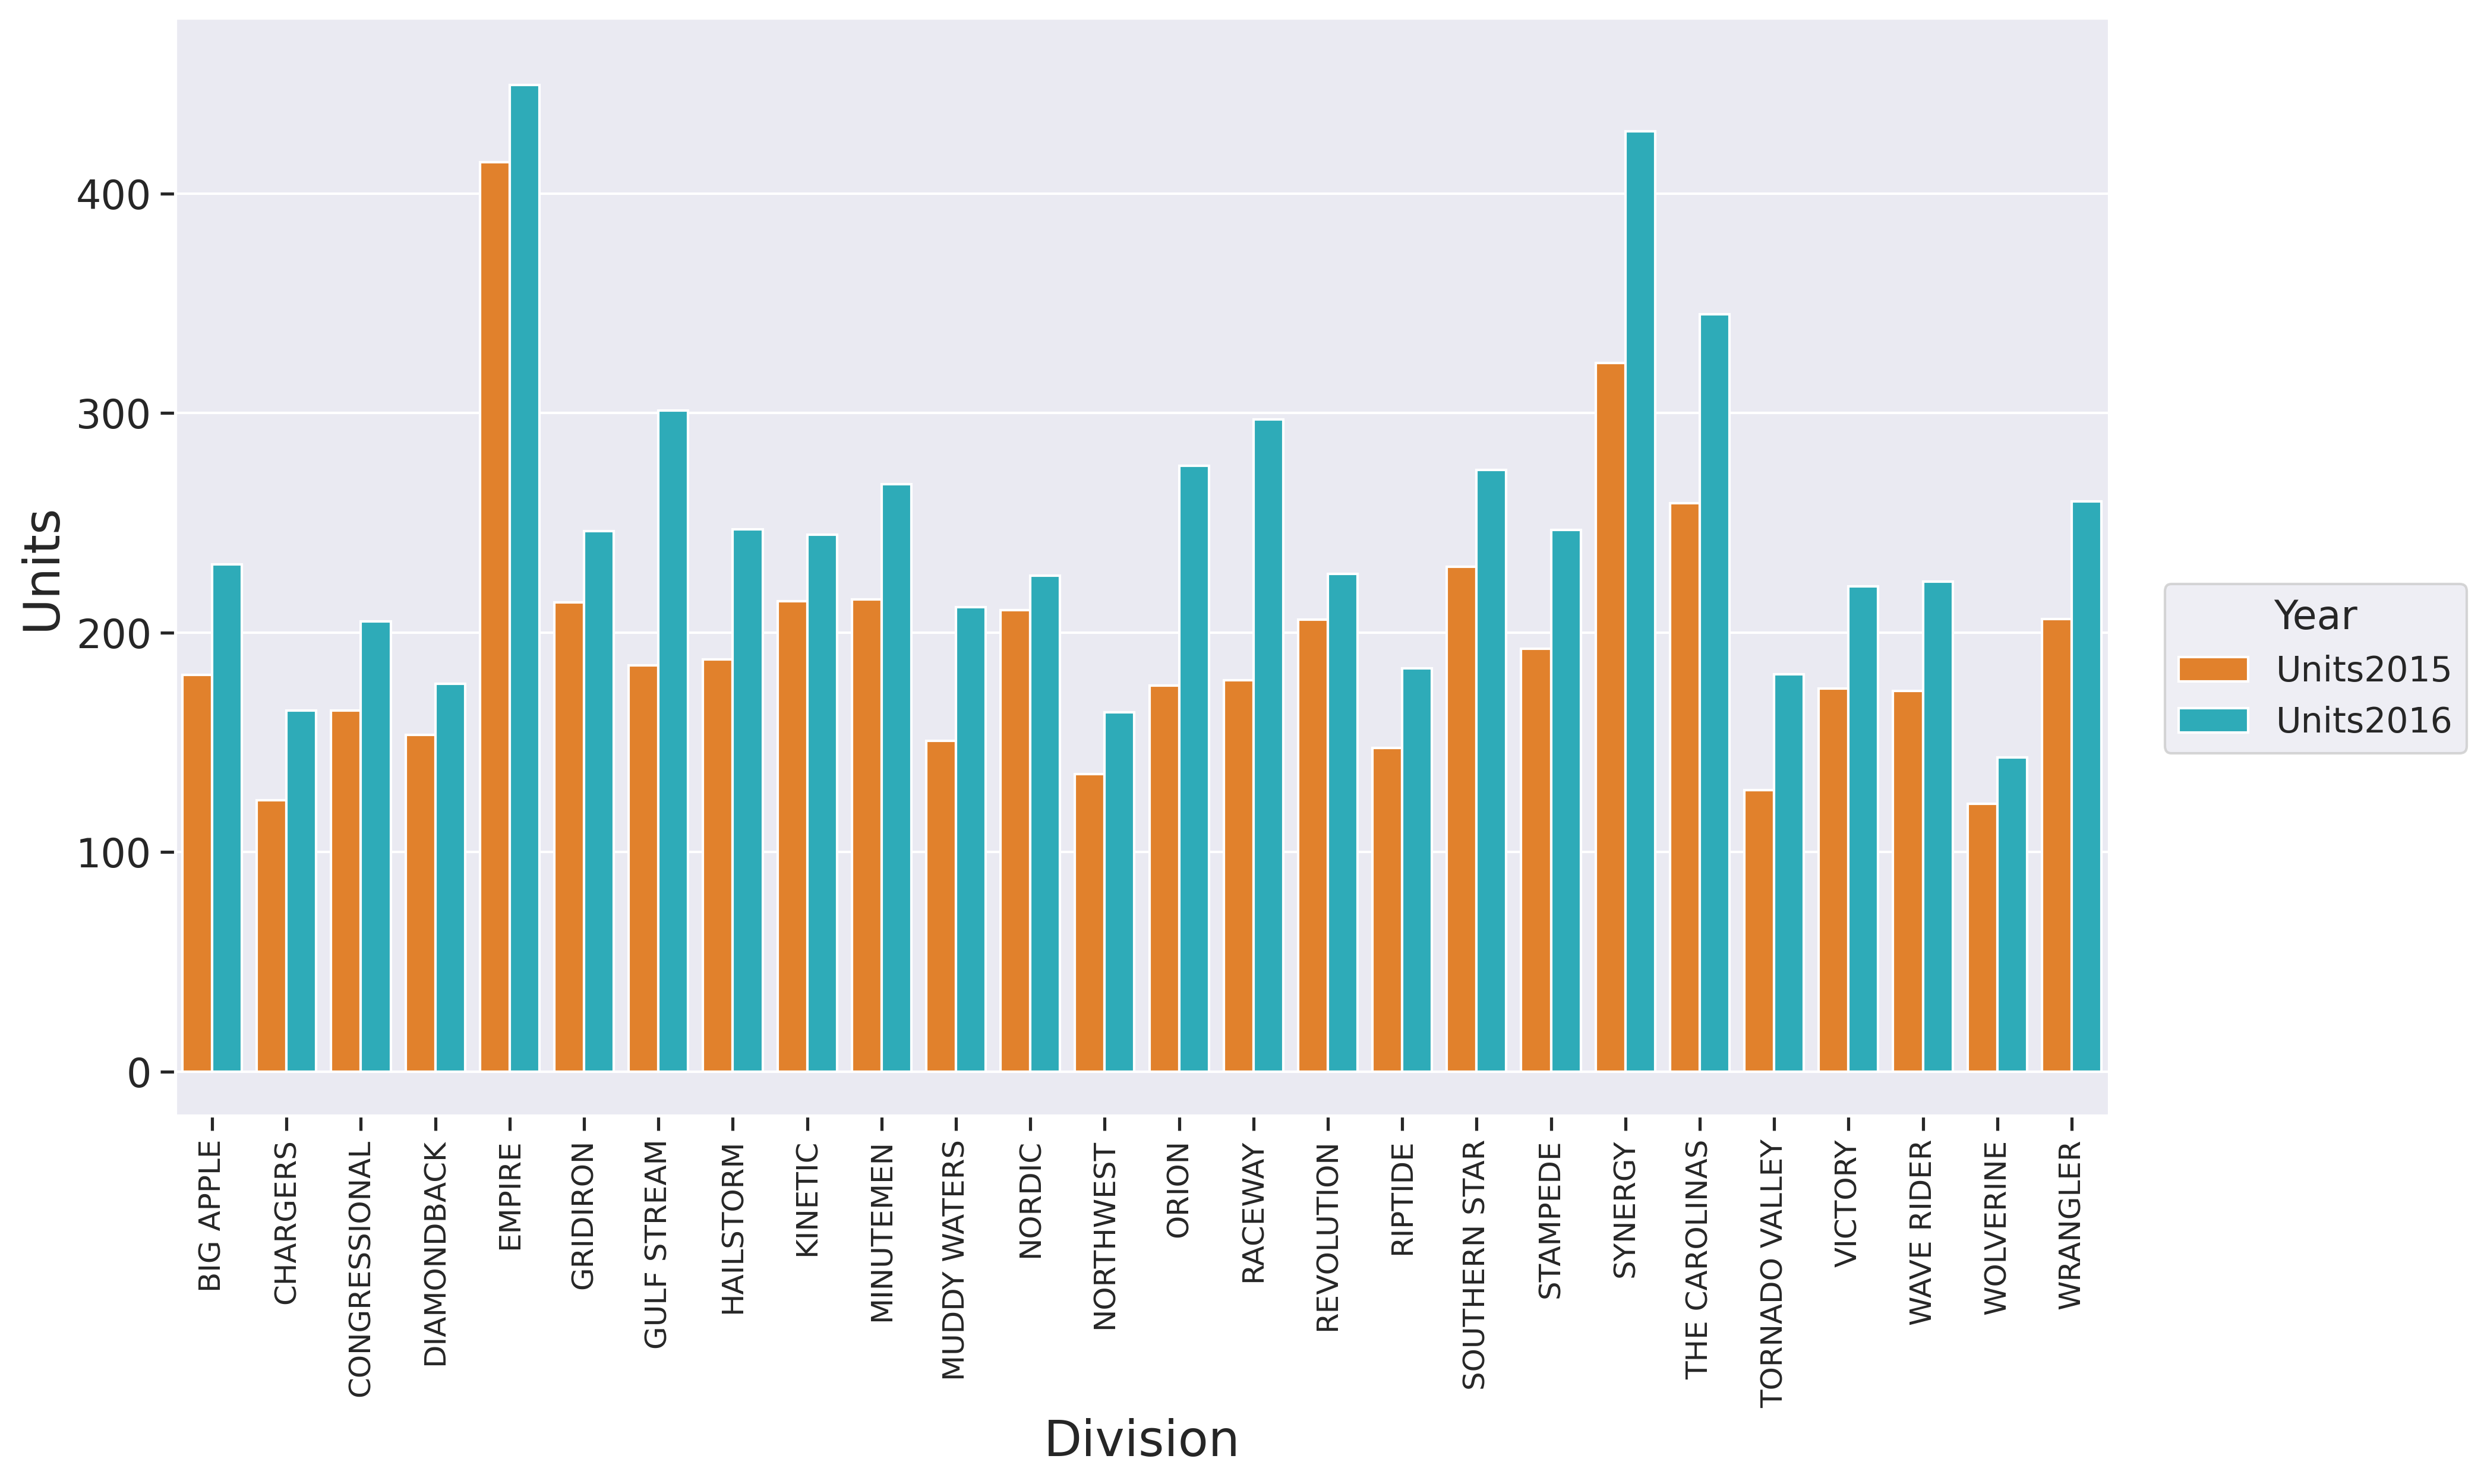

In [33]:
sns.set(rc={'figure.figsize':(14,8)})

sns.barplot(data = data_High, x = 'Division',y = 'TotalUnits',
            hue='SalesYear',palette=['tab:orange','tab:cyan'])

plt.legend(title='Year',bbox_to_anchor=(1.02,0.5),fontsize=14,title_fontsize=16)

plt.ylim(-20,480)

plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=16)

plt.xlabel('Division',fontsize=20)
plt.ylabel('Units',fontsize=20)

plt.tick_params(bottom=True, left=True)

plt.show()

#### Quarter wise sales 

In [34]:
def quarter(month):
    if month == 'Jan' or month == 'Feb' or month == 'Mar':
        qrtr = 'Q1'
    elif month == 'Apr' or month == 'May' or month == 'Jun':
        qrtr = 'Q2'
    elif month == 'Jul' or month == 'Aug' or month == 'Sep':
        qrtr = 'Q3'
    elif month == 'Oct' or month == 'Nov' or month == 'Dec':
        qrtr = 'Q4'
    return qrtr        

In [35]:
quarter('Dec')

'Q4'

In [36]:
# Creating new column 'Qtr' in the data
SalesData['Qtr'] = SalesData['Month'].apply(quarter)

In [37]:
data_Qtr = pd.DataFrame(SalesData.groupby('Qtr')
                         ['Sales2015','Sales2016'].sum().stack())

In [38]:
data_Qtr.reset_index(inplace=True)

In [39]:
data_Qtr.rename({'level_1':'SalesYear',0:'TotalSales'},axis=1,inplace=True)
data_Qtr.head()

,Qtr,SalesYear,TotalSales
0,Q1,Sales2015,5.485800e+06
1,Q1,Sales2016,6.997953e+06
2,Q2,Sales2015,5.390862e+06
3,Q2,Sales2016,7.237361e+06
4,Q3,Sales2015,6.164094e+06


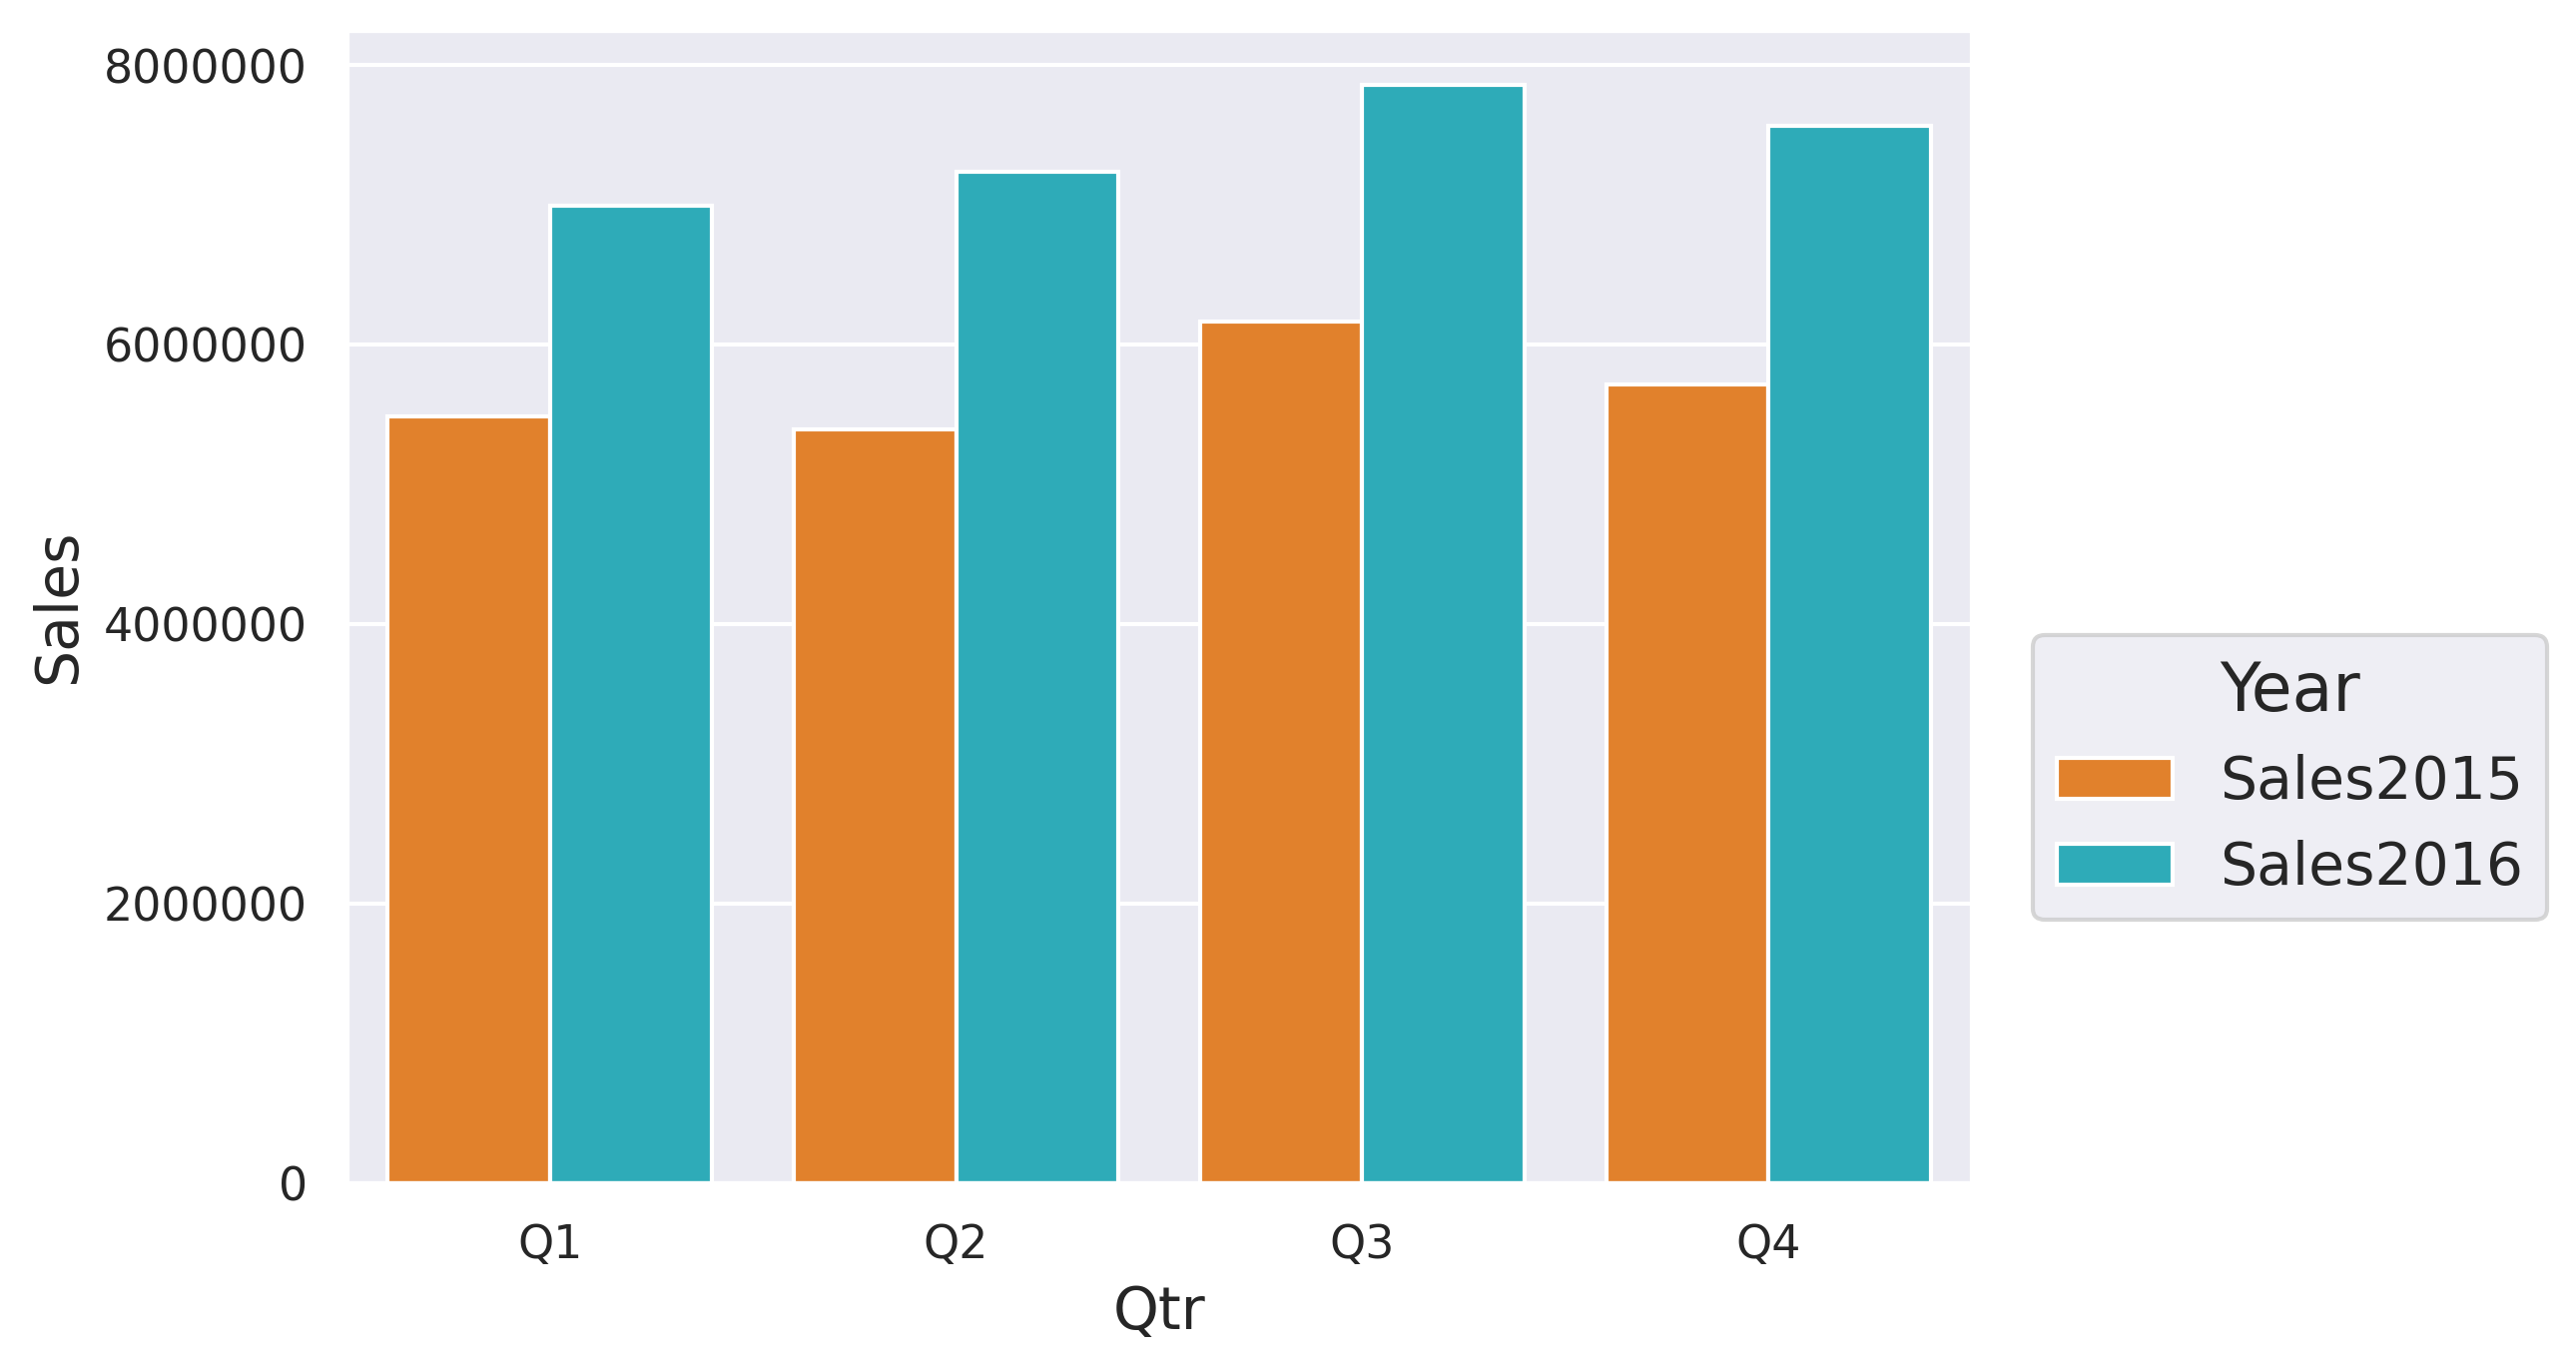

In [40]:
fig, ax = plt.subplots(1,figsize = (7,5))

sns.set(rc={'figure.figsize':(10,8)})

sns.barplot(data = data_Qtr, x = 'Qtr',y = 'TotalSales',
            hue='SalesYear',palette=['tab:orange','tab:cyan'])

plt.legend(title='Year',bbox_to_anchor=(1.02,0.5),fontsize=14,title_fontsize=16)


plt.xlabel('Qtr',fontsize=14)
plt.ylabel('Sales',fontsize=14)

ax.set_yticks([0,2000000,4000000,6000000,8000000])
plt.ticklabel_format(axis="y",style='plain')

plt.show()

Q3 has recorded highest sales for both years.

#### Quarter wise sales of 2016 with regard to all the Tiers.

In [41]:
crosstab_data = pd.crosstab(index=SalesData['Tier'],
           columns=SalesData['Qtr'],
           values=SalesData['Sales2016'],
           aggfunc='sum',normalize='columns').round(3)

crosstab_data

Qtr,Q1,Q2,Q3,Q4
Tier,,,,
High,0.553,0.571,0.620,0.626
Low,0.136,0.123,0.101,0.098
Med,0.312,0.306,0.279,0.276
Out,0.000,0.000,-0.000,0.000


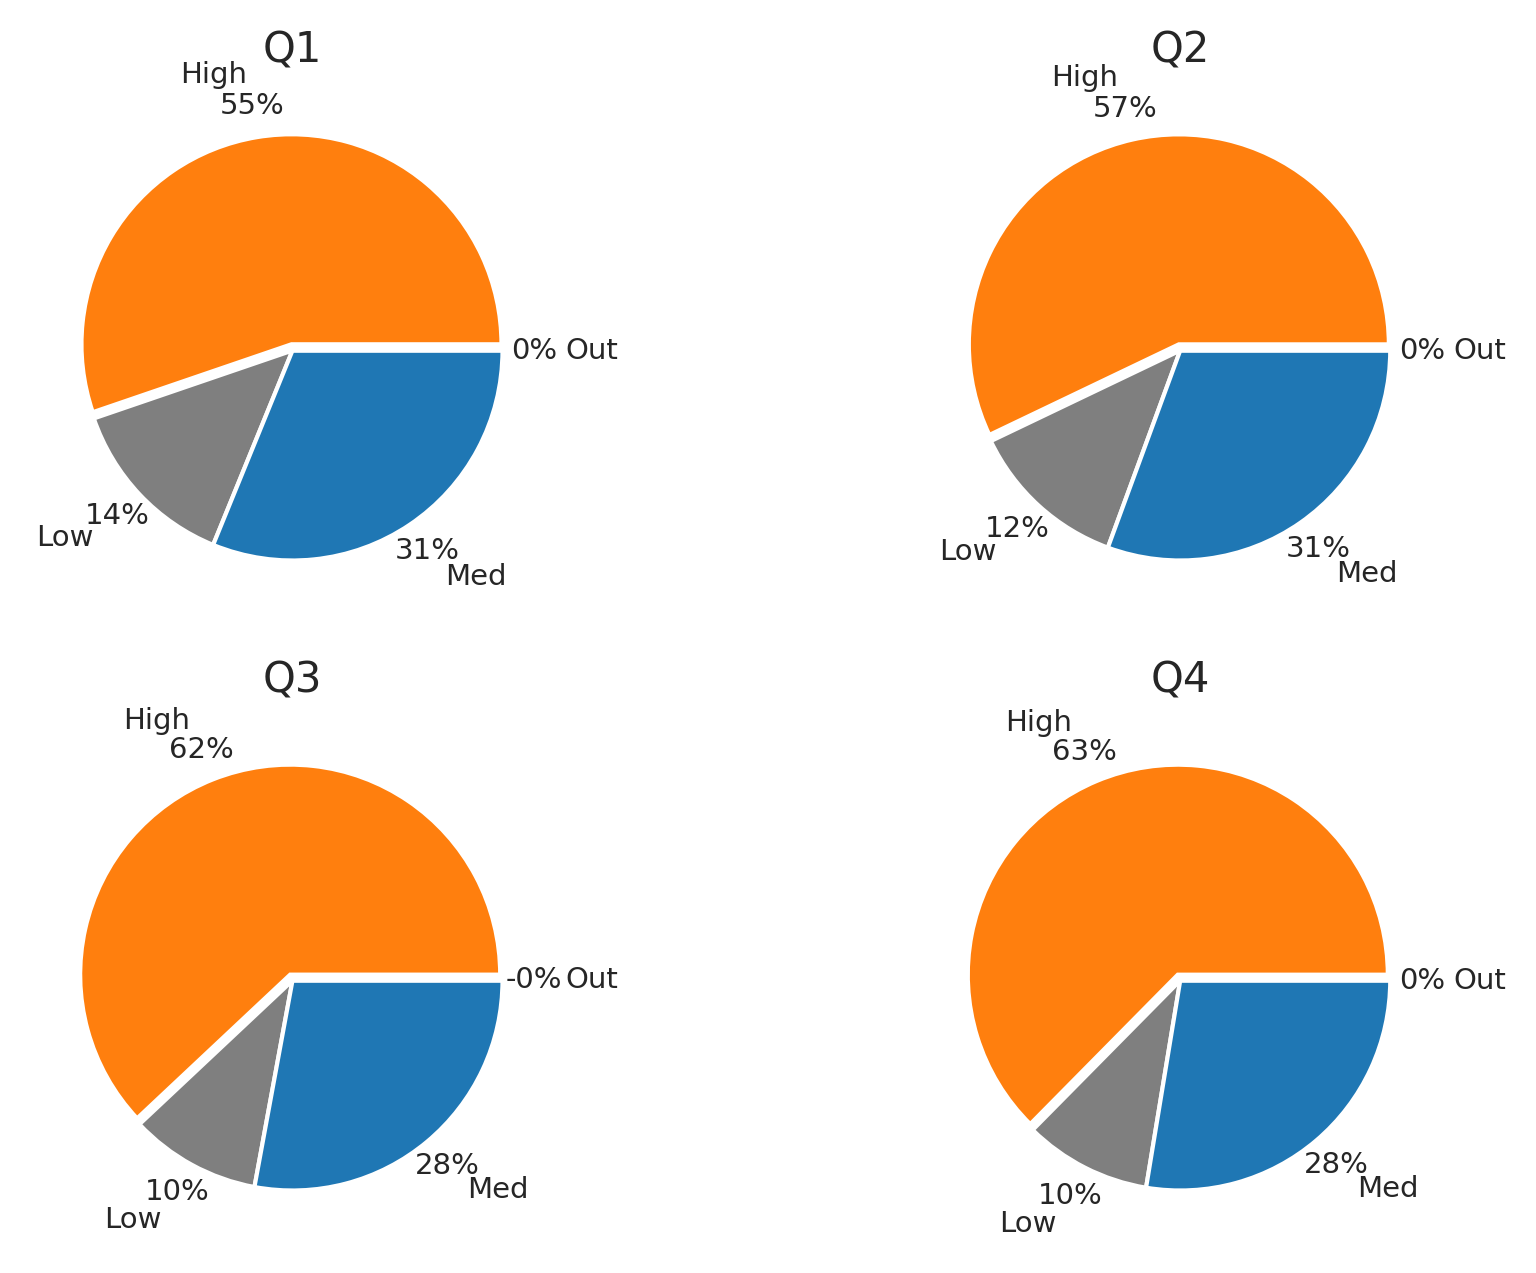

In [42]:
fig, axes = plt.subplots(2, 2, figsize = (7,5))
sns.set(rc={"figure.dpi":300})

plt.rcParams['font.size'] = 7

colors = ['tab:orange','tab:grey','tab:blue','tab:red']
textprops = {"fontsize":7}

axes[0,0].pie(crosstab_data.values[:,0], labels = crosstab_data.index, 
        labeldistance=1.3, radius = 1,
        colors = colors, textprops = textprops,
        explode =[0.03,0,0,0], autopct='%1.0f%%',pctdistance=1.15)

axes[0,1].pie(crosstab_data.values[:,1], labels = crosstab_data.index, 
        labeldistance=1.3, radius = 1,
        colors = colors, textprops = textprops,
        explode =[0.03,0,0,0], autopct='%1.0f%%',pctdistance=1.15)

axes[1,0].pie(crosstab_data.values[:,2], labels = crosstab_data.index, 
        labeldistance=1.3, radius = 1,
        colors = colors, textprops = textprops,
        explode =[0.03,0,0,0], autopct='%1.0f%%',pctdistance=1.15)

axes[1,1].pie(crosstab_data.values[:,3], labels = crosstab_data.index, 
        labeldistance=1.3, radius = 1,
        colors = colors, textprops = textprops,
        explode =[0.03,0,0,0], autopct='%1.0f%%',pctdistance=1.15)

axes[0,0].set_title('Q1',fontsize=10)
axes[0,1].set_title('Q2',fontsize=10)
axes[1,0].set_title('Q3',fontsize=10)
axes[1,1].set_title('Q4',fontsize=10)


plt.show()